In [1]:
import main
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os

In [29]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [36]:
ls /Volumes/LaCie/LaCie/Gcampf6/2GAERSDIV10/

DIV10GAERS_1_1.tif* DIV10GAERS_1_3.tif* DIV10GAERS_1_5.tif*
DIV10GAERS_1_2.tif* DIV10GAERS_1_4.tif*


## Gaers 

In [38]:
base_directory = '/Volumes/LaCie/LaCie/Gcampf6/'

profiles_gaers = {}

for directory in [d for d in os.listdir(base_directory) if 'GAERS' in d]:
    for filename in [d for d in os.listdir(base_directory + directory) if d.endswith('.tif')] :
        image = io.imread(base_directory + directory + '/' + filename)
        print(filename, image.shape)
        profiles[filename] = image.sum(axis=(1,2))

DIV10GAERS_1_1.tif (305, 1024, 1024)
DIV10GAERS_1_2.tif (305, 1024, 1024)
DIV10GAERS_1_3.tif (305, 1024, 1024)
DIV10GAERS_1_4.tif (305, 1024, 1024)
DIV10GAERS_1_5.tif (305, 1024, 1024)
GAERSDIV14_1_1.tif (305, 1024, 1024)
GAERSDIV14_1_2.tif (305, 1024, 1024)
GAERSDIV14_1_3.tif (305, 1024, 1024)
GAERSDIV14_1_4.tif (305, 1024, 1024)
GAERSDIV14_1_5.tif (305, 1024, 1024)
GAERSDIV4_1_1.tif (305, 1024, 1024)
GAERSDIV4_1_2.tif (305, 1024, 1024)
GAERSDIV4_1_3.tif (305, 1024, 1024)
GAERSDIV4_1_31.tif (2, 1024, 1024)
GAERSDIV4_1_4.tif (305, 1024, 1024)
GAERSDIV4_1_5.tif (305, 1024, 1024)
GAERSDIV4_1_6.tif (305, 1024, 1024)
GAERSDIV4_1_7.tif (305, 1024, 1024)
GAERSDIV4_2_1.tif (305, 1024, 1024)
GAERSDIV4_2_2.tif (305, 1024, 1024)
GAERSDIV4_2_3.tif (305, 1024, 1024)
GAERSDIV4_2_4.tif (305, 1024, 1024)
GAERSDIV4_3_1.tif (305, 1024, 1024)
GAERSDIV4_3_2.tif (305, 1024, 1024)
GAERSDIV4_3_3.tif (305, 1024, 1024)
GAERSDIV4_3_4.tif (305, 1024, 1024)
GAERSDIV4_3_5.tif (305, 1024, 1024)
GAERSDIV4_3_6.tif (

(0.8, 1.5)

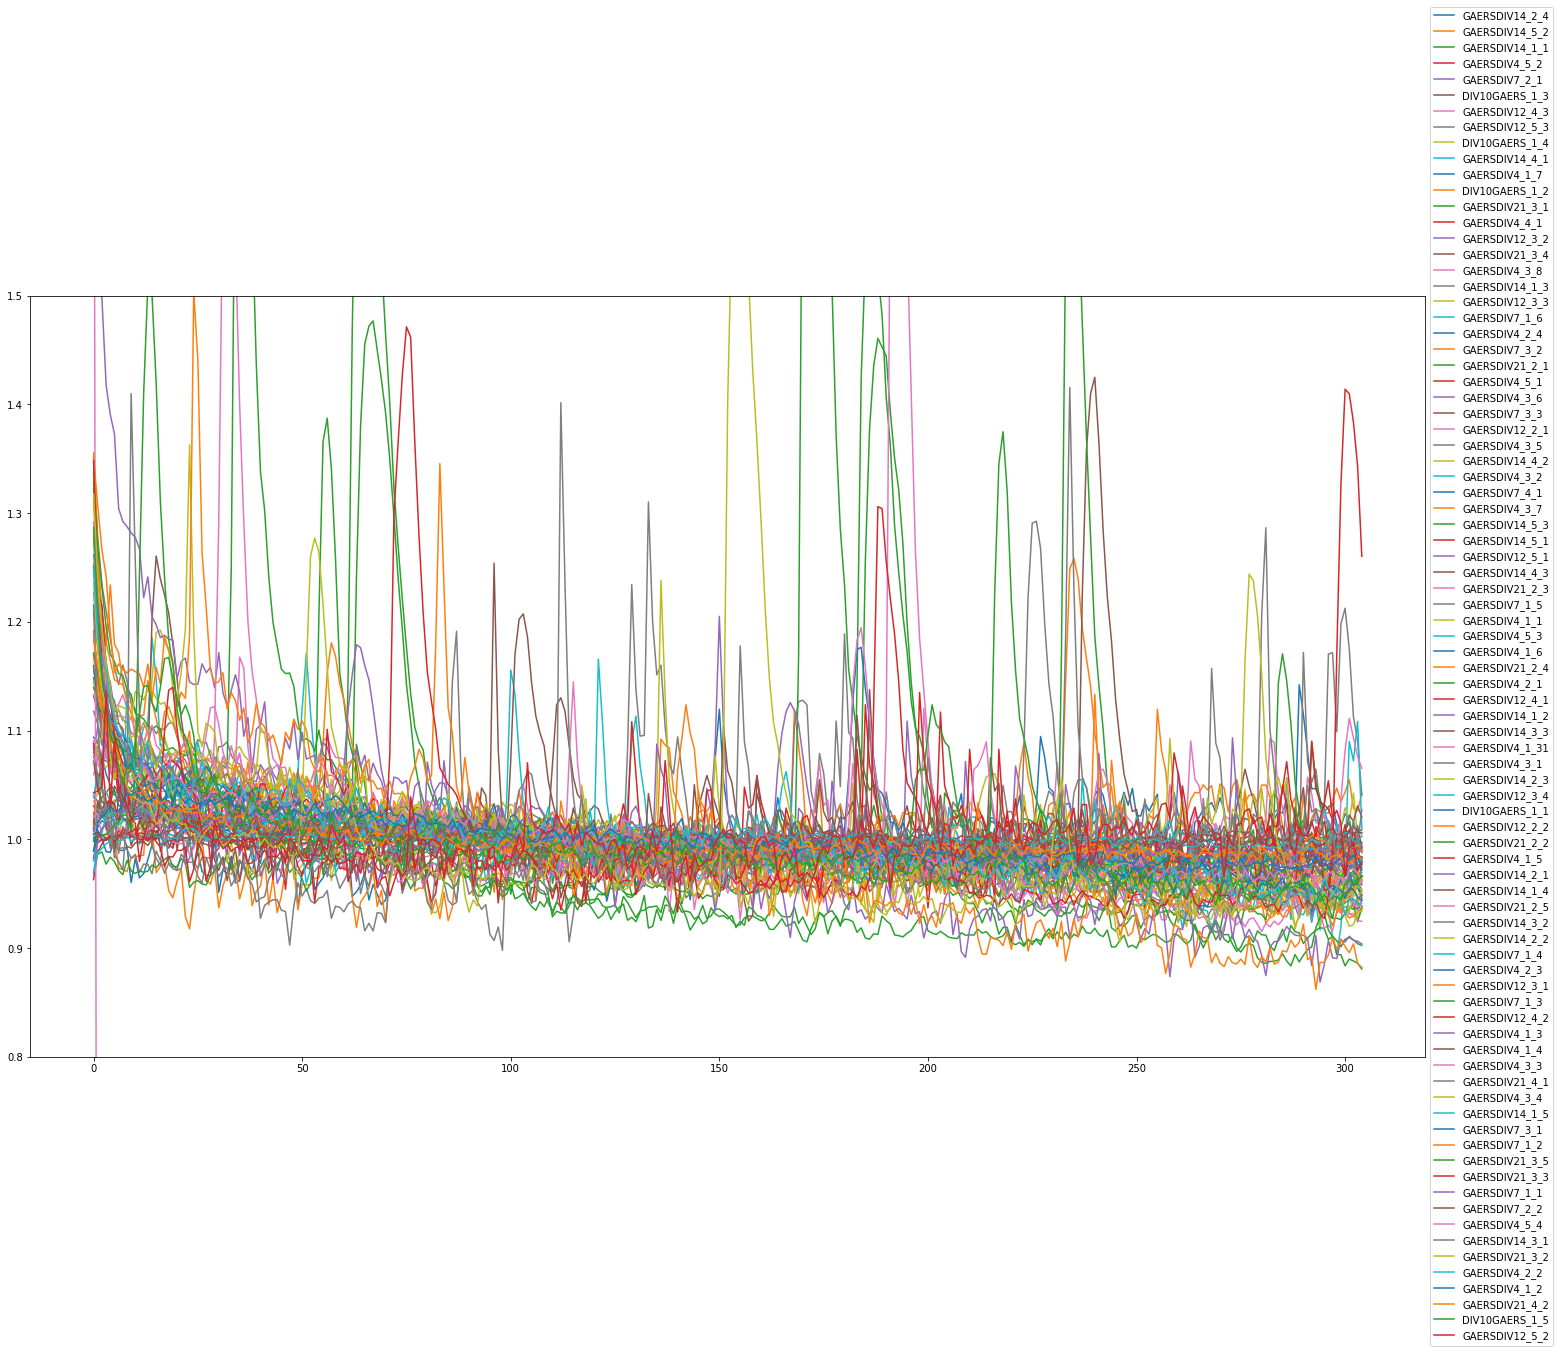

In [39]:
plt.figure(figsize=(25,14))
for filename in profiles:
    plt.plot(profiles[filename]/profiles[filename].mean(), label=filename[:-4])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0.8, 1.5)

In [43]:
# sum = np.zeros(305)
profiles_array = []
for filename in profiles:
    if len(profiles[filename]) == 305:
        profiles_array.append(profiles[filename]/profiles[filename].mean())
profiles_array = np.array(profiles_array)

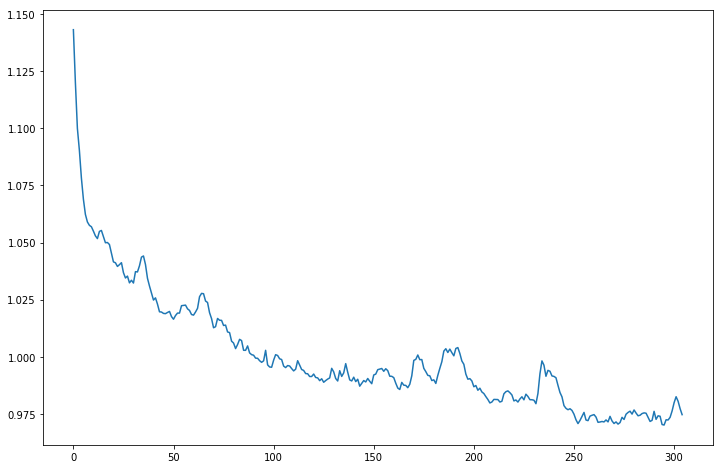

In [58]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(profiles_array.mean(axis=0))

In [62]:
def fitfunc(x, a, b, c):
    return a + b * x**c

In [59]:
from scipy import interpolate
from scipy.optimize import curve_fit

In [50]:
interp = interpolate.CubicSpline(np.arange(len(profiles_array.mean(axis=0))), profiles_array.mean(axis=0))

In [68]:
x = np.arange(len(profiles_array.mean(axis=0)))
cfit = curve_fit(fitfunc, x, profiles_array.mean(axis=0))

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


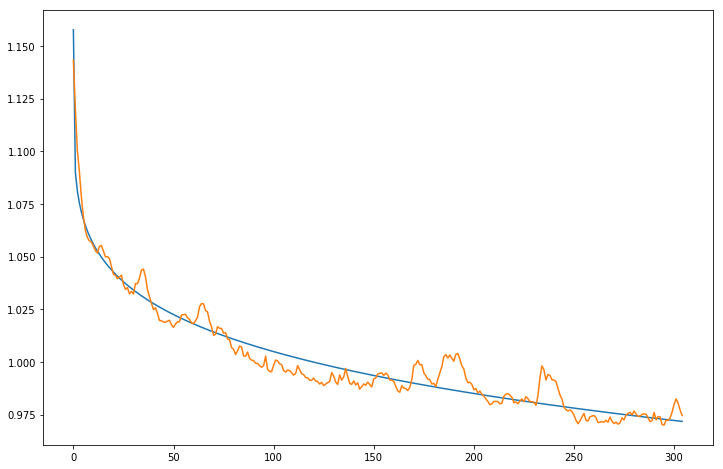

In [71]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fitfunc(x, cfit[0][0], cfit[0][1], cfit[0][2]))
ax.plot(profiles_array.mean(axis=0))

In [73]:
cfit[0]

array([ 1.15768106, -0.06777845,  0.17643486])

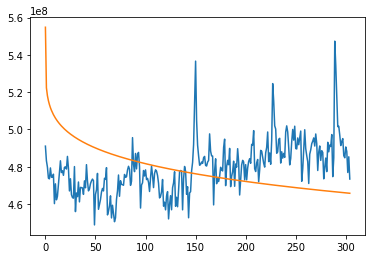

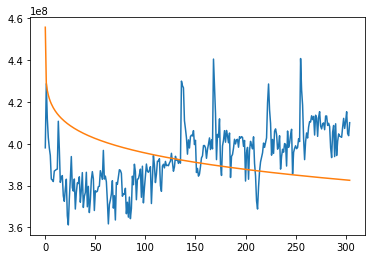

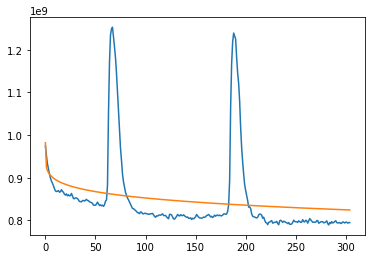

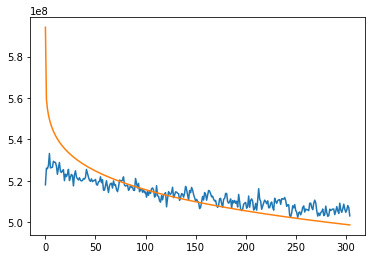

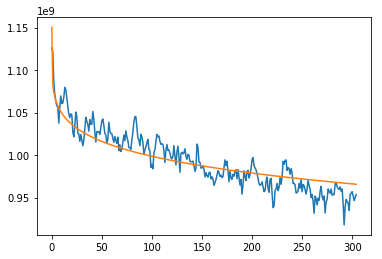

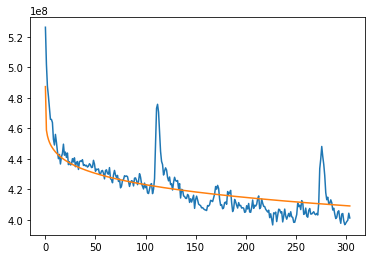

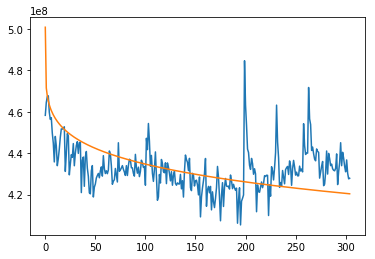

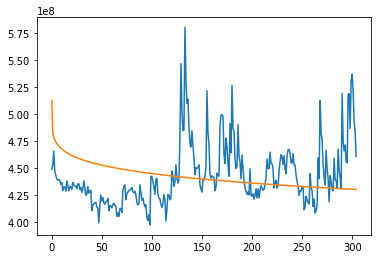

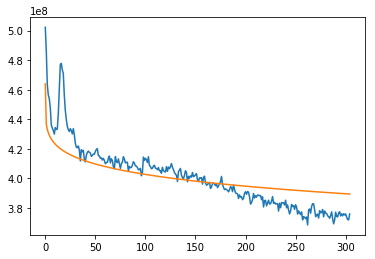

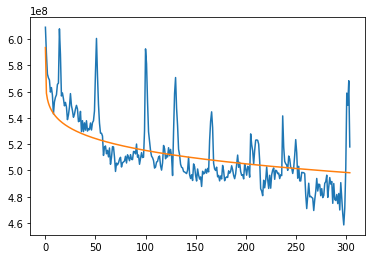

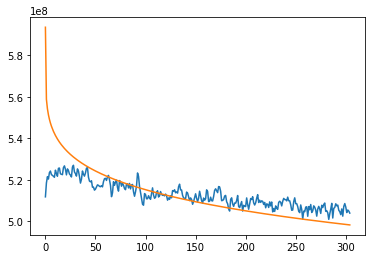

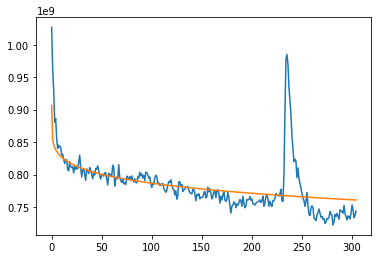

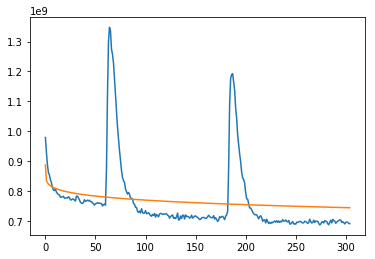

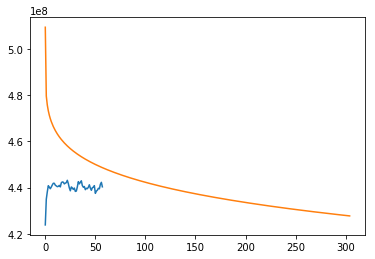

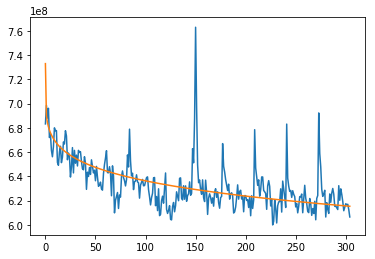

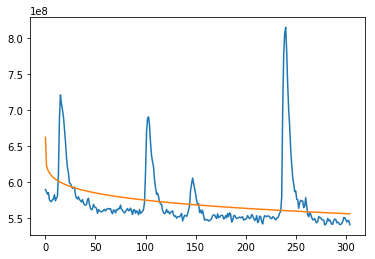

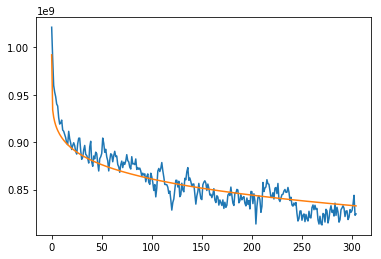

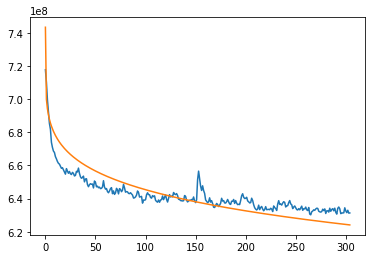

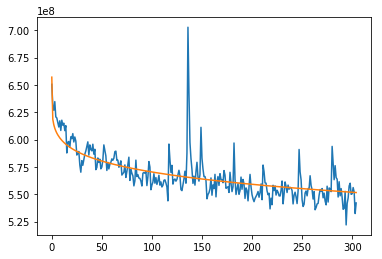

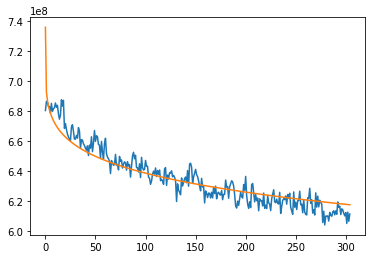

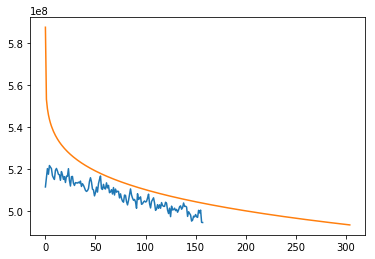

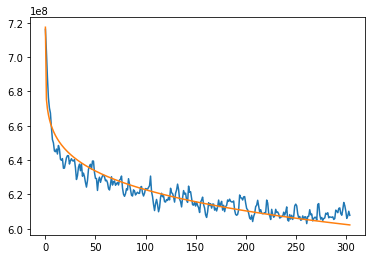

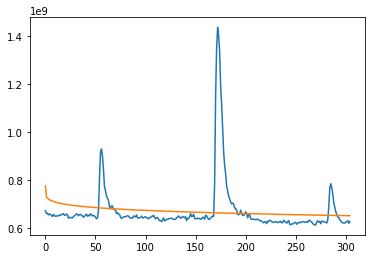

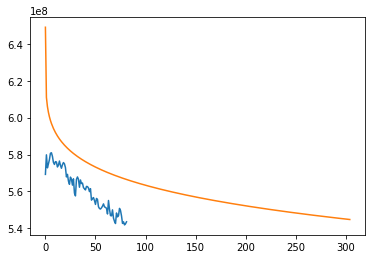

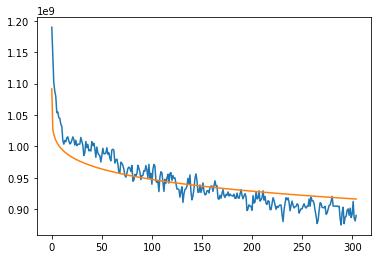

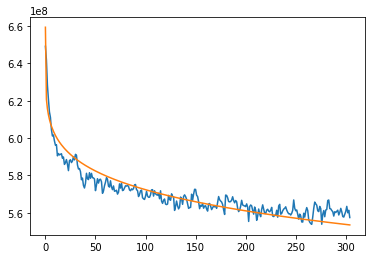

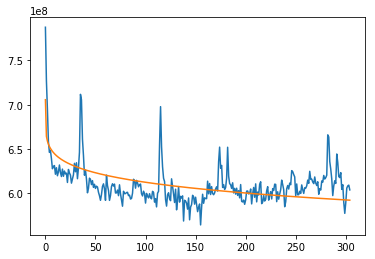

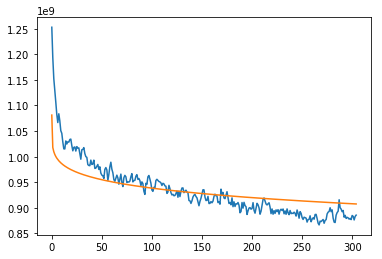

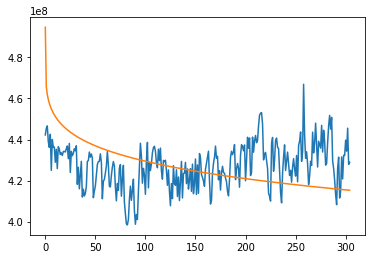

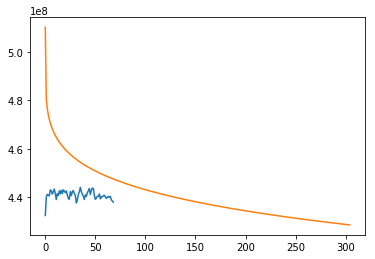

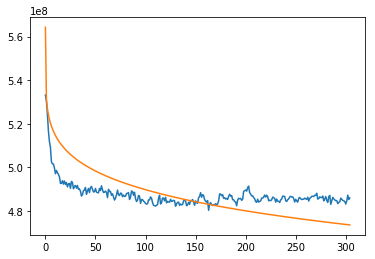

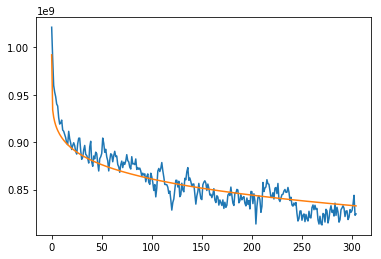

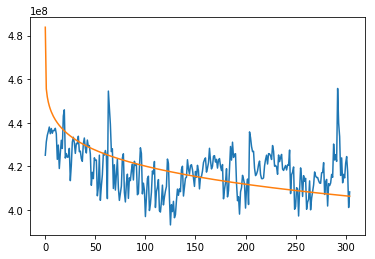

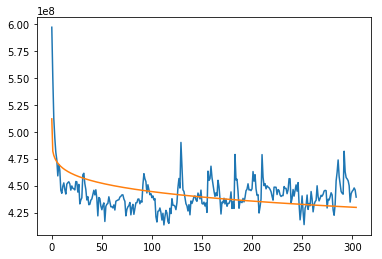

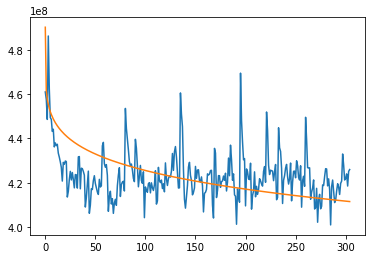

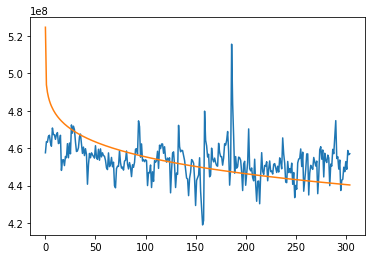

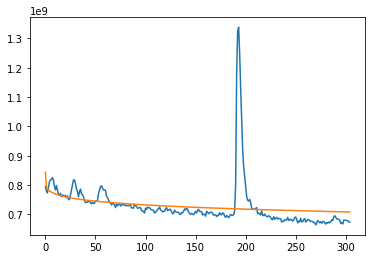

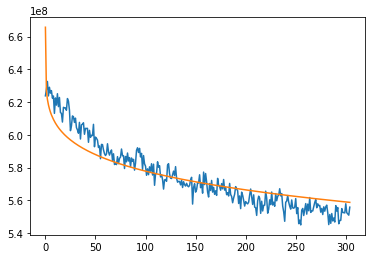

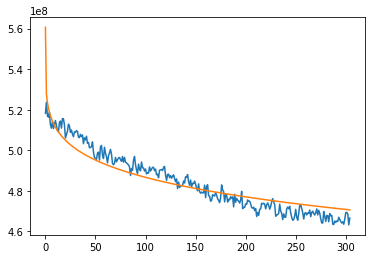

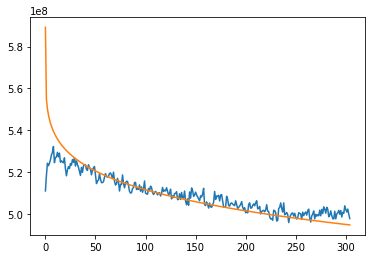

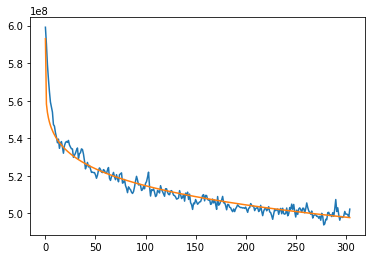

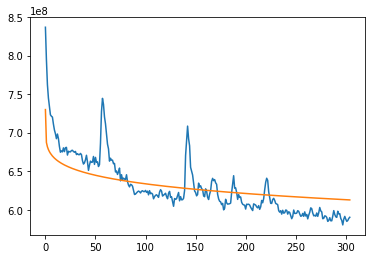

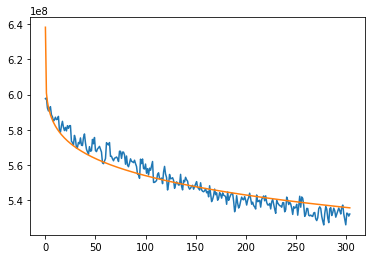

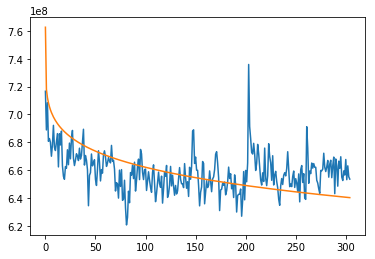

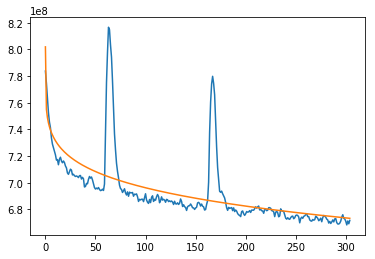

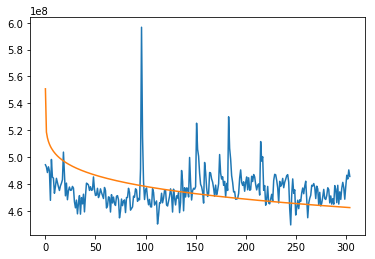

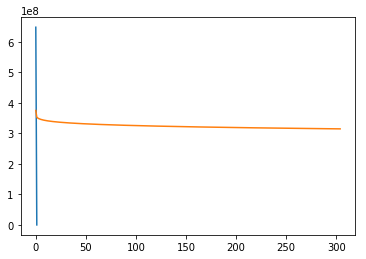

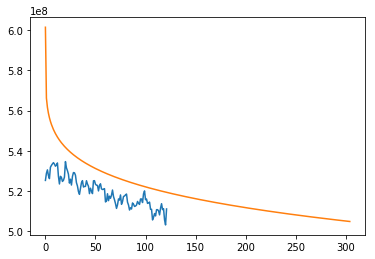

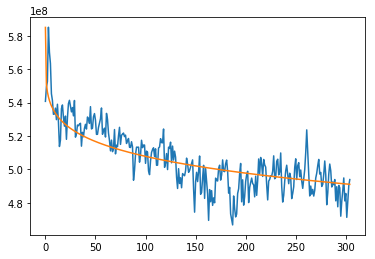

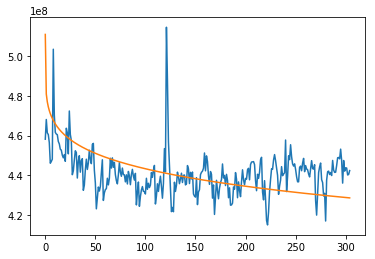

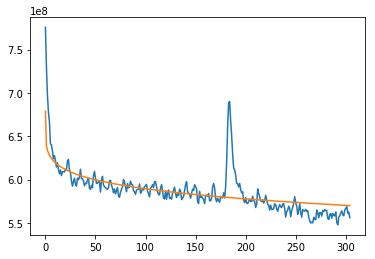

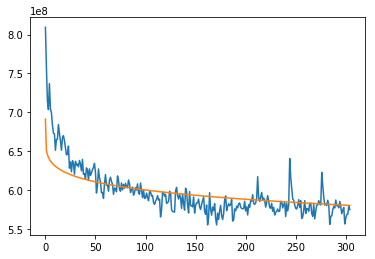

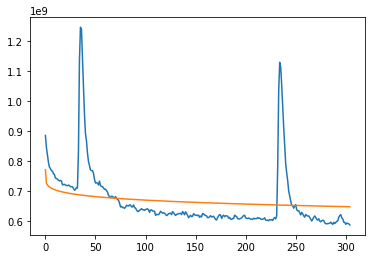

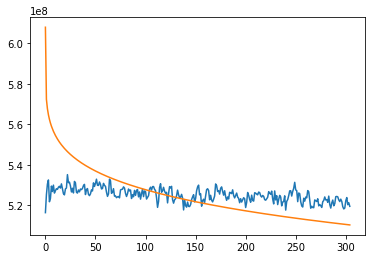

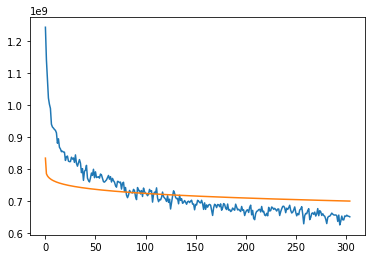

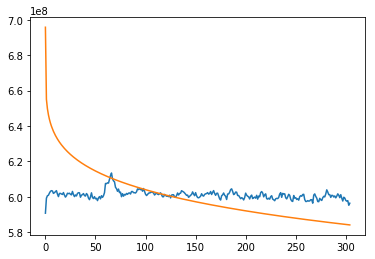

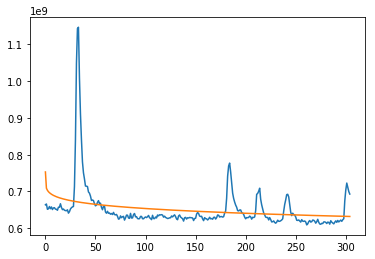

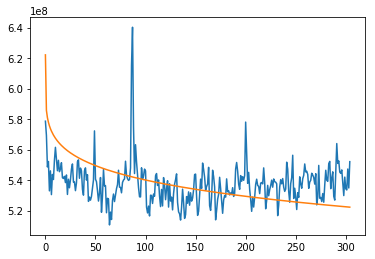

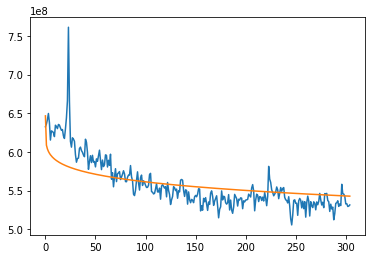

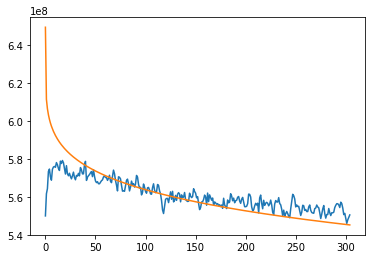

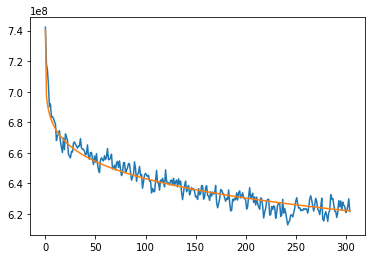

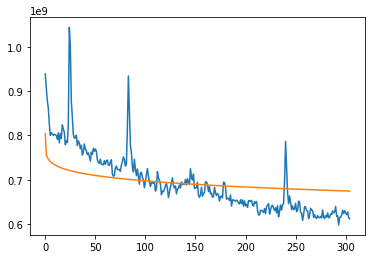

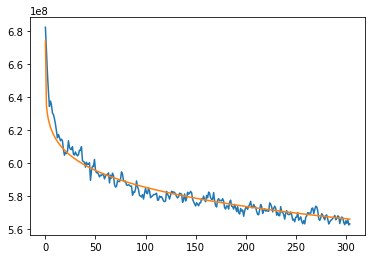

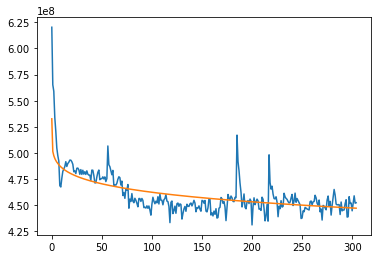

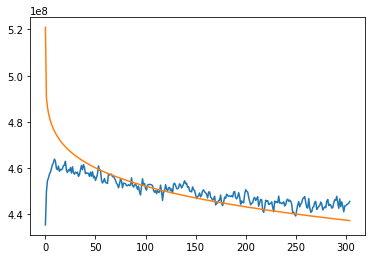

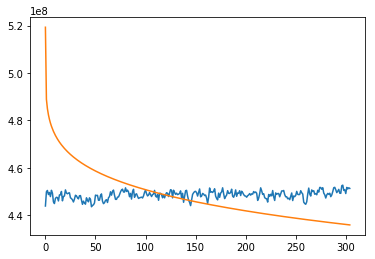

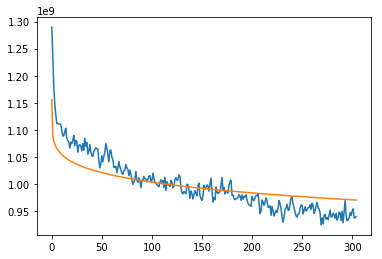

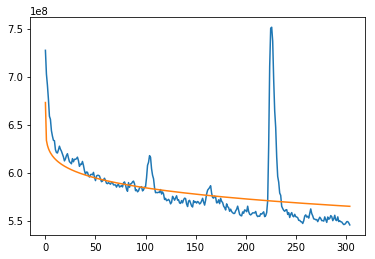

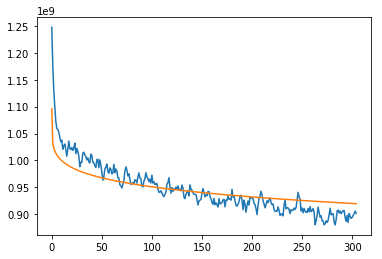

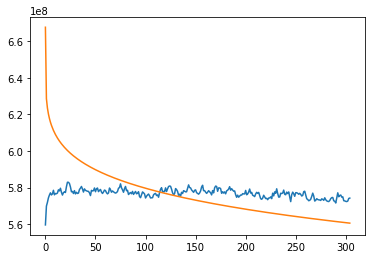

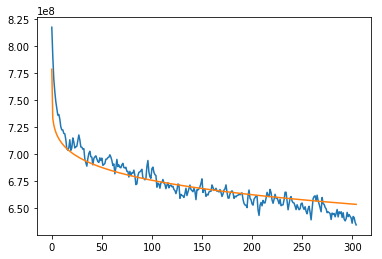

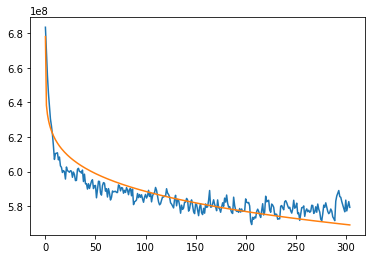

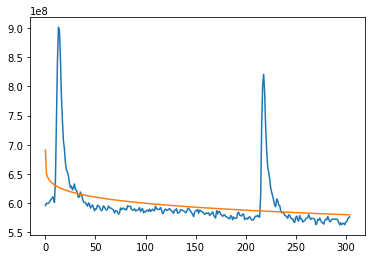

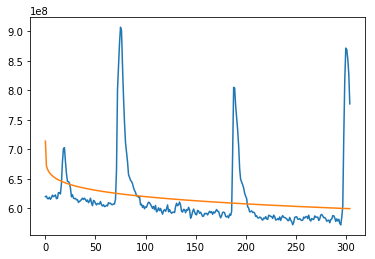

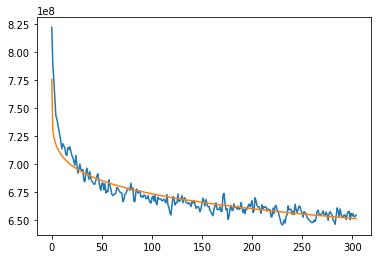

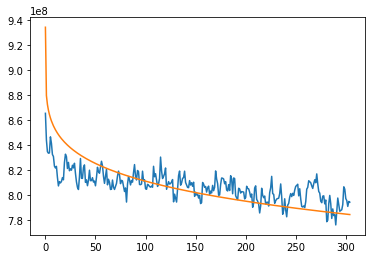

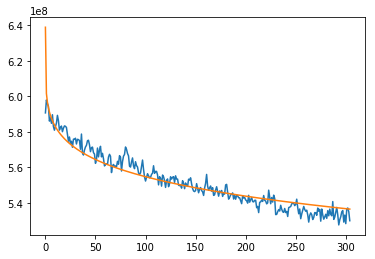

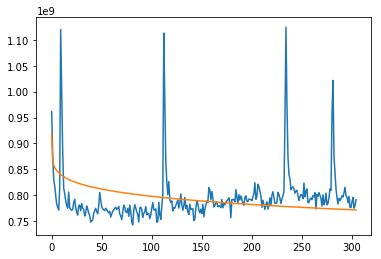

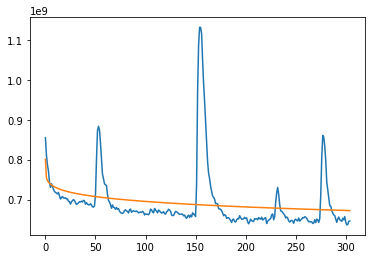

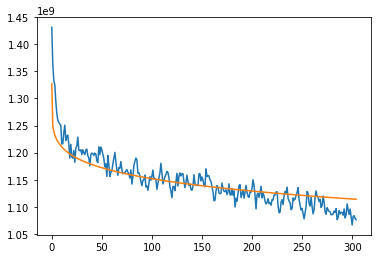

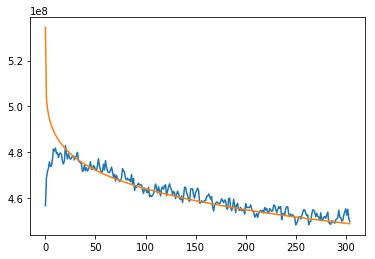

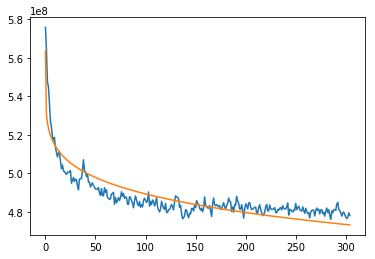

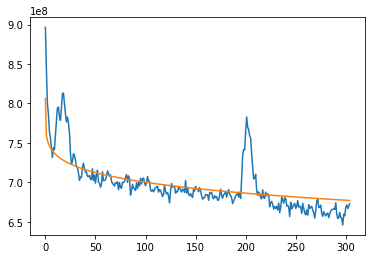

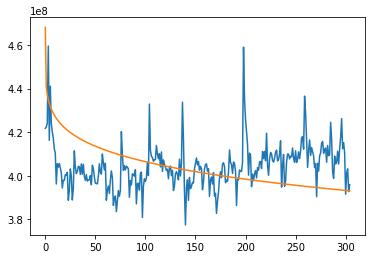

In [109]:
# plt.figure(figsize=(30,15))
for k in profiles:
    p = profiles[k]
    plt.plot(p)
    plt.plot(x, p.mean() * fitfunc(x, cfit[0][0], cfit[0][1], cfit[0][2]))
    plt.show()

## Wistar

In [ ]:
base_directory = '/Volumes/LaCie/LaCie/Gcampf6/'

profiles_gaers = {}

for directory in [d for d in os.listdir(base_directory) if 'GAERS' in d]:
    for filename in [d for d in os.listdir(base_directory + directory) if d.endswith('.tif')] :
        image = io.imread(base_directory + directory + '/' + filename)
        print(filename, image.shape)
        profiles[filename] = image.sum(axis=(1,2))